In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Read input data
gen_cor = pd.read_csv('gen_cor.csv')
obs_cor = pd.read_csv('obs_cor.csv')

inputs = gen_cor.merge(obs_cor, on=['trait1', 'trait2']).drop_duplicates()

In [3]:
# Check that we have each pair twice ([x, y] and [y, x]) for merge with directed graph
edges = [[row.trait1, row.trait2] for i, row in inputs.iterrows()]
reverse_check = [edge[::-1] in edges for edge in edges]
assert sum(reverse_check) == len(inputs)

In [4]:
# Read target data
edges = pd.read_csv('../../data/processed/mr-eve-edgelist.csv')
X_y = inputs.merge(edges, left_on=['trait1', 'trait2'], right_on=['head_node', 'tail_node']).drop_duplicates()
del edges

# Save merged edgelist for embedding 
out = X_y[['head_node', 'tail_node', 'neglog_pval', 'abs_effect']].drop_duplicates()
out.to_csv('MR_obscor_gencor_edgelist.csv', index=False)

In [5]:
# Prepare X and y dataframes
X = X_y[['rg', 'cor']]
y_effect = X_y['abs_effect']
y_pval = X_y['neglog_pval']
del X_y

In [6]:
# Fit model on effect size edge weights
effect_model = LinearRegression().fit(X, y_effect)
effect_r2 = effect_model.score(X, y_effect)
print(f'Regression of absolute effect on genetic and observational correlation.')
print(f'R2 = {effect_r2}')

Regression of absolute effect on genetic and observational correlation.
R2 = 0.40215010670701856


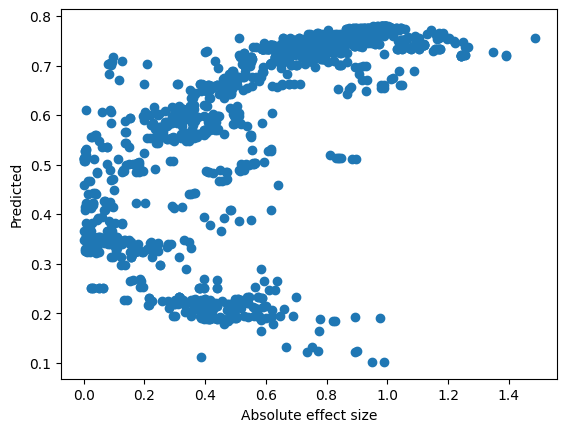

In [7]:
# Plot fitted values against actual weights
plt.scatter(y_effect, effect_model.predict(X))
plt.ylabel('Predicted')
plt.xlabel('Absolute effect size')
plt.show()

In [8]:
# Fit model on effect size edge weights
pval_model = LinearRegression().fit(X, y_pval)
pval_r2 = pval_model.score(X, y_pval)
print(f'Regression of -log10(pval) on genetic and observational correlation.')
print(f'R2 = {pval_r2}')

Regression of -log10(pval) on genetic and observational correlation.
R2 = 0.5788689686382369


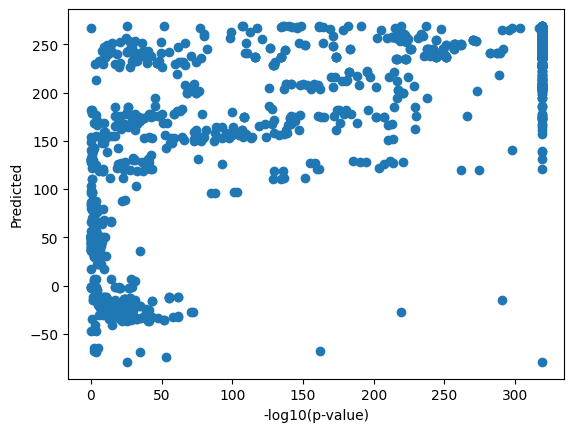

In [9]:
plt.scatter(y_pval, pval_model.predict(X))
plt.ylabel('Predicted')
plt.xlabel('-log10(p-value)')
plt.show()